In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
# Read the CSV file with proper data type handling
video1 = pd.read_csv('examples_interactions_pietons/t1_107-119_2023-06-15 08_27_58.csv', sep=';')


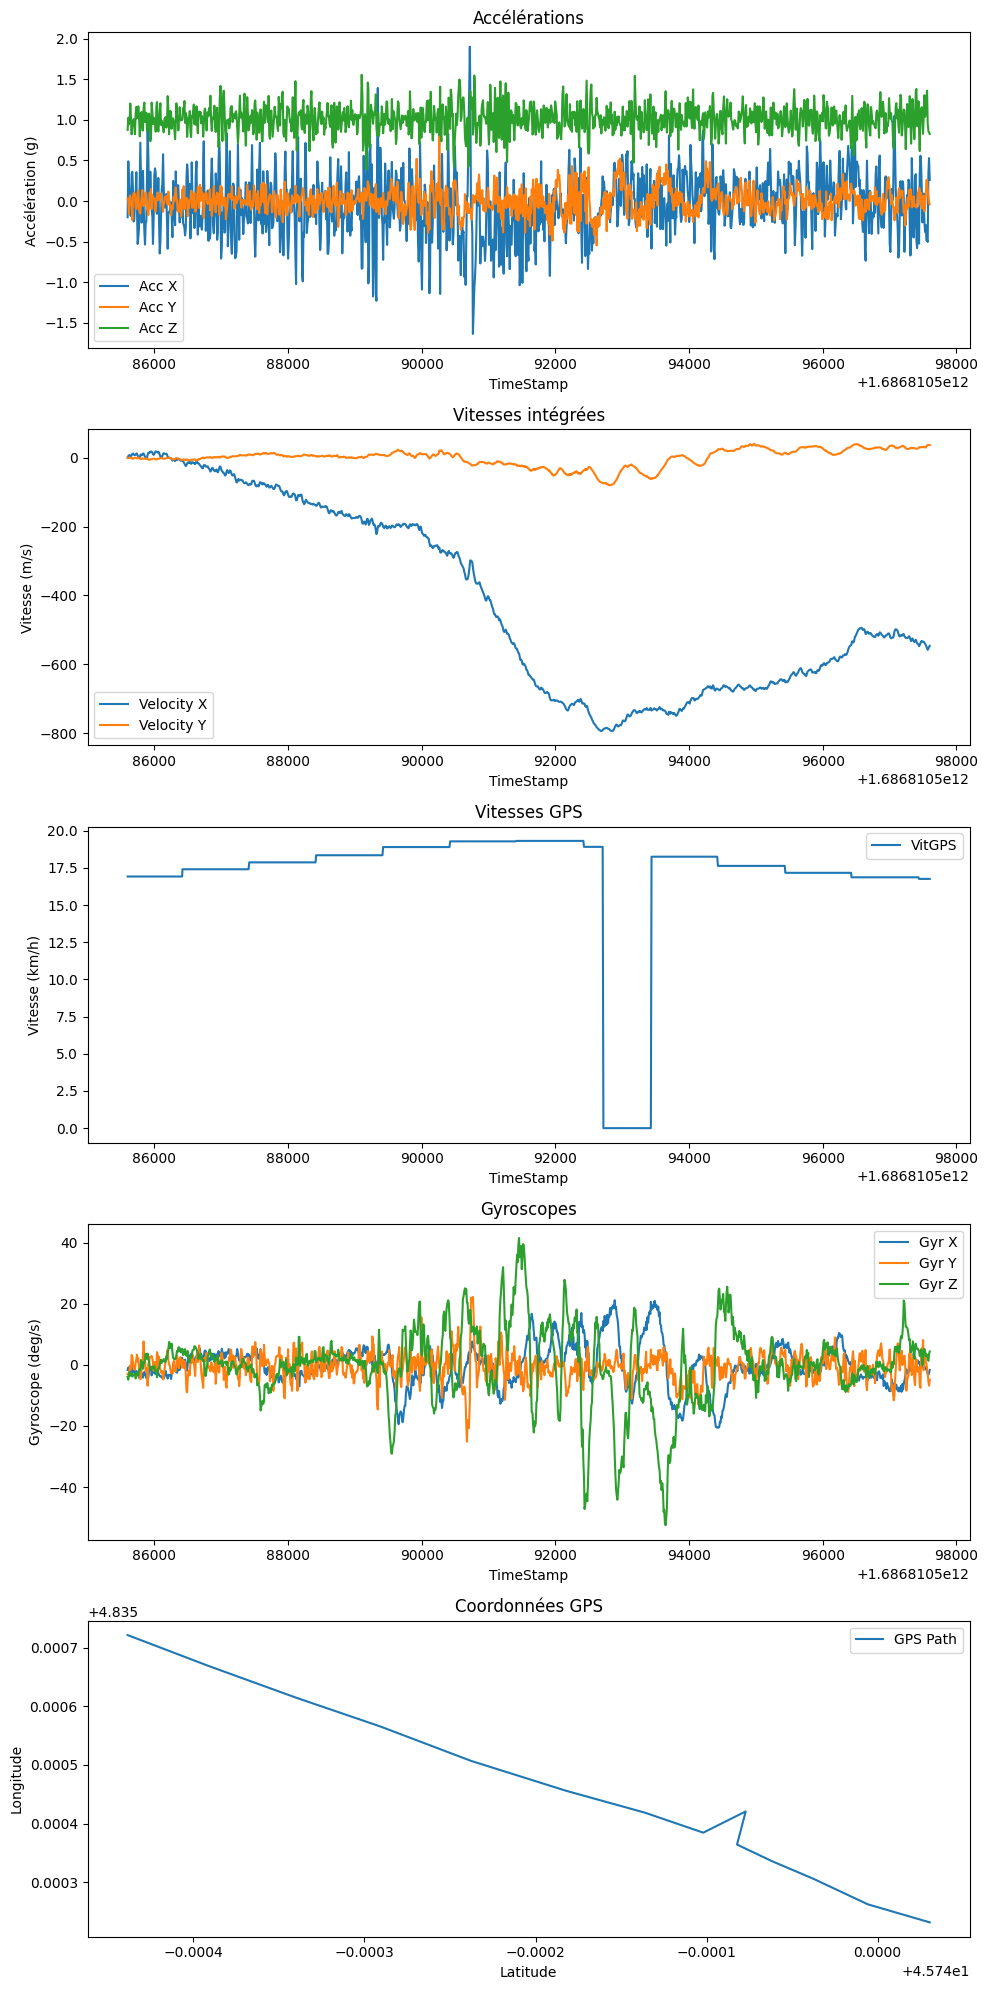

In [37]:

# Calculer la différence de temps entre chaque point de données
time_diff = np.diff(video1['TimeStamp'], prepend=video1['TimeStamp'].iloc[0])

# Intégrer les données d'accélération pour obtenir la vitesse
velocity_x = np.cumsum(video1[' AccX(g)'] * time_diff)
velocity_y = np.cumsum(video1[' AccY(g)'] * time_diff)
velocity_z = np.cumsum(video1[' AccZ(g)'] * time_diff)

# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(5, 1, figsize=(10, 20))

# Plot des accélérations
axs[0].plot(video1['TimeStamp'], video1[' AccX(g)'], label='Acc X')
axs[0].plot(video1['TimeStamp'], video1[' AccY(g)'], label='Acc Y')
axs[0].plot(video1['TimeStamp'], video1[' AccZ(g)'], label='Acc Z')
axs[0].set_title('Accélérations')
axs[0].set_xlabel('TimeStamp')
axs[0].set_ylabel('Accélération (g)')
axs[0].legend()

# Plot des vitesses intégrées
axs[1].plot(video1['TimeStamp'], velocity_x, label='Velocity X')
axs[1].plot(video1['TimeStamp'], velocity_y, label='Velocity Y')
axs[1].set_title('Vitesses intégrées')
axs[1].set_xlabel('TimeStamp')
axs[1].set_ylabel('Vitesse (m/s)')
axs[1].legend()

# Plot des vitesses GPS
axs[2].plot(video1['TimeStamp'], video1[' VitGPS(km/h)'], label='VitGPS')
axs[2].set_title('Vitesses GPS')
axs[2].set_xlabel('TimeStamp')
axs[2].set_ylabel('Vitesse (km/h)')
axs[2].legend()

# Plot des gyroscopes
axs[3].plot(video1['TimeStamp'], video1[' GyrX(deg/s)'], label='Gyr X')
axs[3].plot(video1['TimeStamp'], video1[' GyrY(deg/s)'], label='Gyr Y')
axs[3].plot(video1['TimeStamp'], video1[' GyrZ(deg/s)'], label='Gyr Z')
axs[3].set_title('Gyroscopes')
axs[3].set_xlabel('TimeStamp')
axs[3].set_ylabel('Gyroscope (deg/s)')
axs[3].legend()

# Plot des coordonnées GPS
axs[4].plot(video1[' Lat'], video1[' Long'], label='GPS Path')
axs[4].set_title('Coordonnées GPS')
axs[4].set_xlabel('Latitude')
axs[4].set_ylabel('Longitude')
axs[4].legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

In [46]:
from shapely.geometry import Point

test_geojson = gpd.read_file('examples_interactions_pietons/t1_107-119_2023-06-15 08_27_58.csv')
test_geojson['Long'] = pd.to_numeric(test_geojson['Long'], errors='coerce')
test_geojson['Lat'] = pd.to_numeric(test_geojson['Lat'], errors='coerce')
test_geojson = test_geojson.dropna(subset=['Long', 'Lat'])

geometry = [Point(xy) for xy in zip(test_geojson['Long'], test_geojson['Lat'])]
geo_df = gpd.GeoDataFrame(test_geojson, geometry=geometry)

# Enregistrer la GeoDataFrame en tant que fichier GeoJSON
geo_df.to_file('output.geojson', driver='GeoJSON')

/Users/martin.dejaeghere/miniconda3/lib/python3.12/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [22]:
video2 = pd.read_csv('examples_interactions_pietons/t2_140-152_2022-11-24 12_00_52.csv', sep=';')


In [27]:
import cv2
import os

# Charger la vidéo
video_path = '/Users/martin.dejaeghere/NEWMOB/examples_interactions_pietons/t2_140-150_2022-11-24 12_00_52.mp4'
cap = cv2.VideoCapture(video_path)

# Vérifier si la vidéo a été chargée correctement
if not cap.isOpened():
    print("Erreur lors de l'ouverture de la vidéo")
else:
    # Créer un répertoire pour stocker les images
    output_dir = 'frames_2'
    os.makedirs(output_dir, exist_ok=True)

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Nombre total d'images (frames) : {frame_count}")

    frame_index = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Enregistrer chaque frame en tant qu'image
        frame_filename = os.path.join(output_dir, f'frame_{frame_index:04d}.png')
        cv2.imwrite(frame_filename, frame)
        frame_index += 1

    print(f"Images enregistrées dans le répertoire : {output_dir}")

# Libérer la capture vidéo
cap.release()

Nombre total d'images (frames) : 301
Images enregistrées dans le répertoire : frames_2


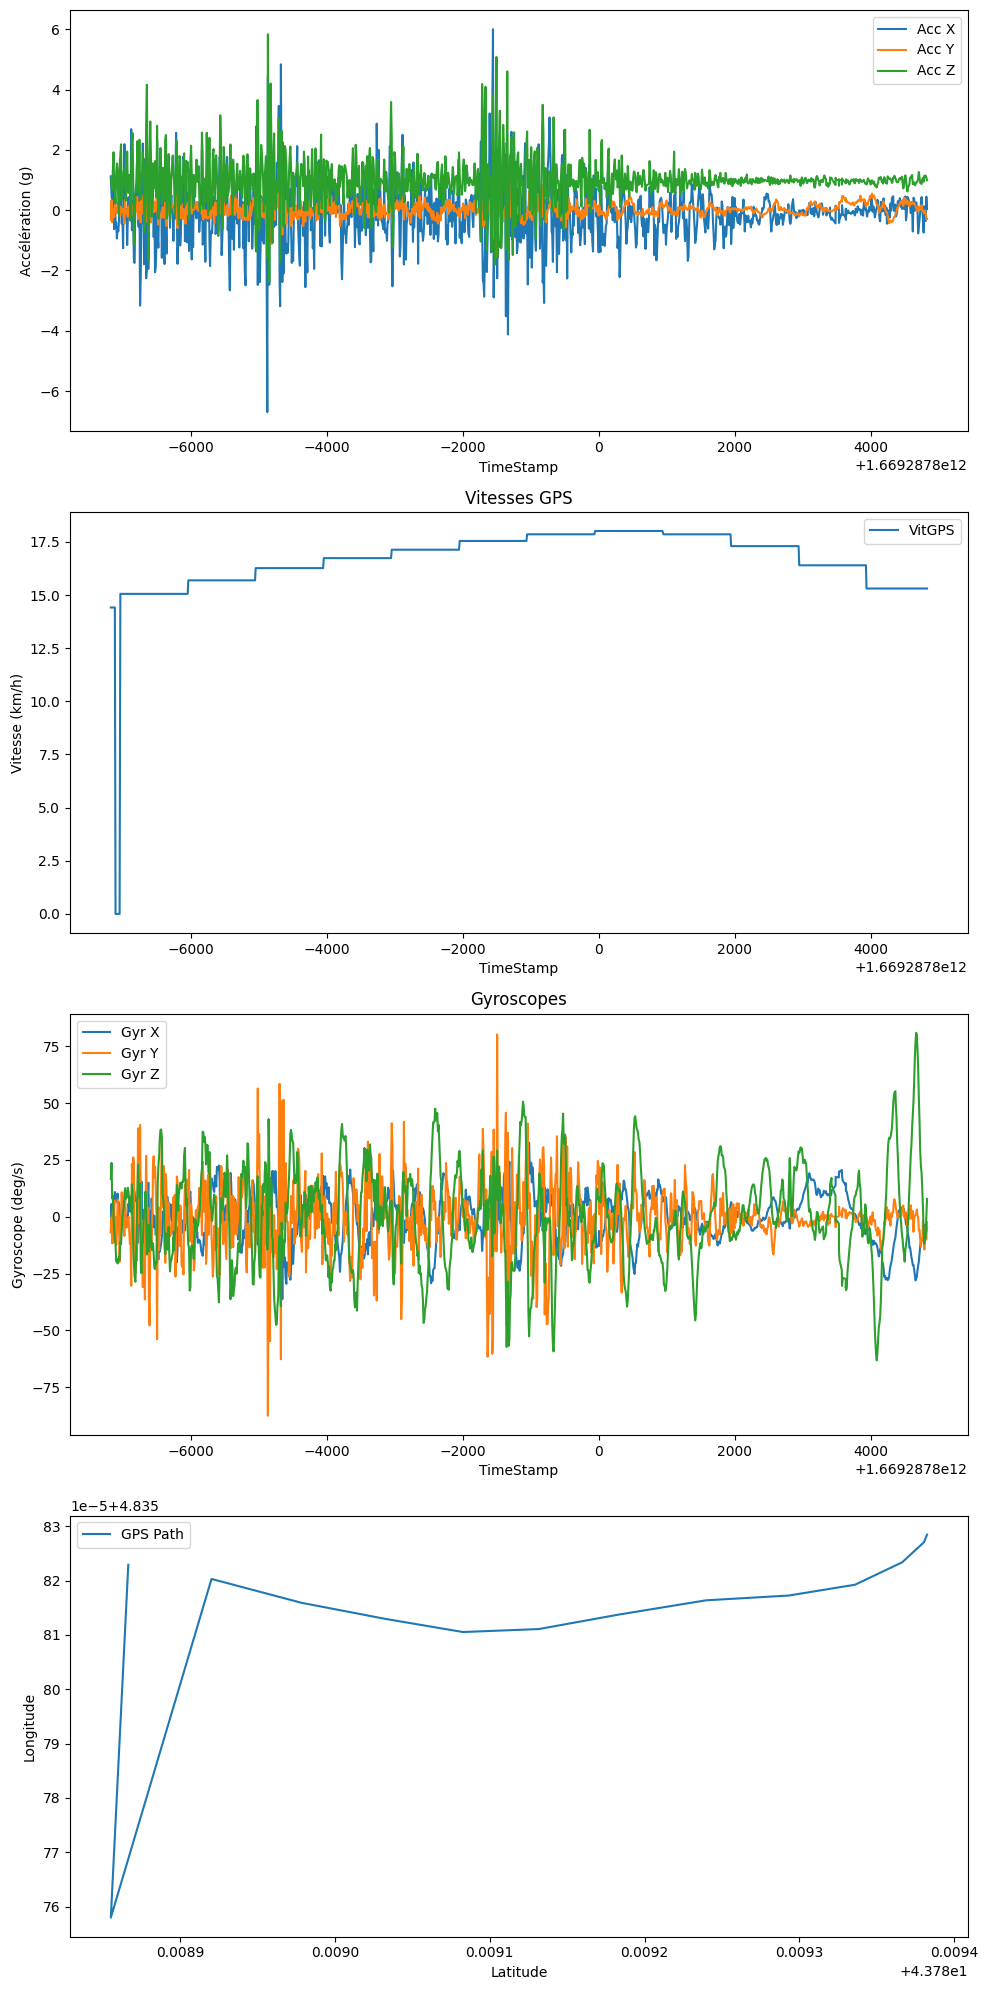

In [34]:

# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Calculer la position de la ligne verticale (1/3 des timestamps)
timestamp_position = video2['TimeStamp'].iloc[len(video2) // 3]

# Timestamp pour "pedestrian stopping"
timestamp_stopping = video2['TimeStamp'].iloc[655]

# Plot des accélérations
axs[0].plot(video2['TimeStamp'], video2[' AccX(g)'], label='Acc X')
axs[0].plot(video2['TimeStamp'], video2[' AccY(g)'], label='Acc Y')
axs[0].plot(video2['TimeStamp'], video2[' AccZ(g)'], label='Acc Z')

axs[0].set_xlabel('TimeStamp')
axs[0].set_ylabel('Accélération (g)')
axs[0].legend()

# Plot des vitesses GPS
axs[1].plot(video2['TimeStamp'], video2[' VitGPS(km/h)'], label='VitGPS')

axs[1].set_title('Vitesses GPS')
axs[1].set_xlabel('TimeStamp')
axs[1].set_ylabel('Vitesse (km/h)')
axs[1].legend()

# Plot des gyroscopes
axs[2].plot(video2['TimeStamp'], video2[' GyrX(deg/s)'], label='Gyr X')
axs[2].plot(video2['TimeStamp'], video2[' GyrY(deg/s)'], label='Gyr Y')
axs[2].plot(video2['TimeStamp'], video2[' GyrZ(deg/s)'], label='Gyr Z')

axs[2].set_title('Gyroscopes')
axs[2].set_xlabel('TimeStamp')
axs[2].set_ylabel('Gyroscope (deg/s)')
axs[2].legend()


# Plot des coordonnées GPS
axs[3].plot(video2[' Lat'], video2[' Long'], label='GPS Path')

axs[3].set_xlabel('Latitude')
axs[3].set_ylabel('Longitude')
axs[3].legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()